In [1]:
import pandas as pd
import pandas_datareader as dr
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
df = dr.data.get_data_yahoo('VTI', start='2000-01-01', end='2018-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,56.005001,55.174999,55.424999,55.665001,1067400.0,39.560894
2001-06-18,55.915001,55.310001,55.814999,55.310001,282600.0,39.308609
2001-06-19,56.165001,55.235001,56.150002,55.465000,1777600.0,39.418774
2001-06-20,56.075001,55.375000,55.375000,56.049999,476000.0,39.834538
2001-06-21,56.724998,55.875000,56.000000,56.500000,240400.0,40.154324
...,...,...,...,...,...,...
2018-12-24,122.540001,119.669998,121.900002,119.699997,14488500.0,118.074158
2018-12-26,125.519997,119.349998,120.339996,125.459999,12512300.0,123.755928
2018-12-27,126.589996,121.910004,123.760002,126.589996,16128500.0,124.870575


In [3]:
grouper = df.groupby([df.index.year, df.index.month])
data = []
for g, gdf in grouper:
    data.append(gdf.index.min())

In [4]:
mdf = df[df.index.to_series().isin(data)]
mdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-06-15,56.005001,55.174999,55.424999,55.665001,1067400.0,39.560894
2001-07-02,56.970001,56.299999,56.299999,56.650002,290000.0,40.361584
2001-08-01,55.970001,55.474998,55.599998,55.660000,237400.0,39.656246
2001-09-04,53.035000,51.900002,52.169998,51.900002,71600.0,36.977337
2001-10-01,47.299999,46.654999,47.099998,47.044998,922000.0,33.637947
...,...,...,...,...,...,...
2018-08-01,145.529999,144.490005,145.190002,144.919998,1524100.0,141.441849
2018-09-04,150.100006,149.220001,149.889999,149.860001,2342700.0,146.263306
2018-10-01,150.770004,149.520004,150.419998,149.880005,2718800.0,146.981064


In [5]:
sdf = pd.DataFrame(index=mdf.index, columns = ["lump sum", "DCA"])
for i in range(len(mdf)-12) : 
    startv = mdf["Adj Close"].iloc[i]
    endv = df["Adj Close"].iloc[-1]
    sdf.iloc[i, 0] = (endv-startv) / startv * 100
    
    windf = mdf.iloc[i:i+12, -1]
    xdf = (endv-windf) / windf
    ddf = windf / windf.sum()
    sdf.iloc[i, 1] = (xdf * ddf).sum() * 100

In [6]:
sdf

,lump sum,DCA
Date,,
2001-06-15,218.235,235.316
2001-07-02,211.921,238.68
2001-08-01,217.469,244.637
2001-09-04,240.469,252.475
2001-10-01,274.269,258.542
...,...,...
2018-08-01,NaN,NaN
2018-09-04,NaN,NaN
2018-10-01,NaN,NaN


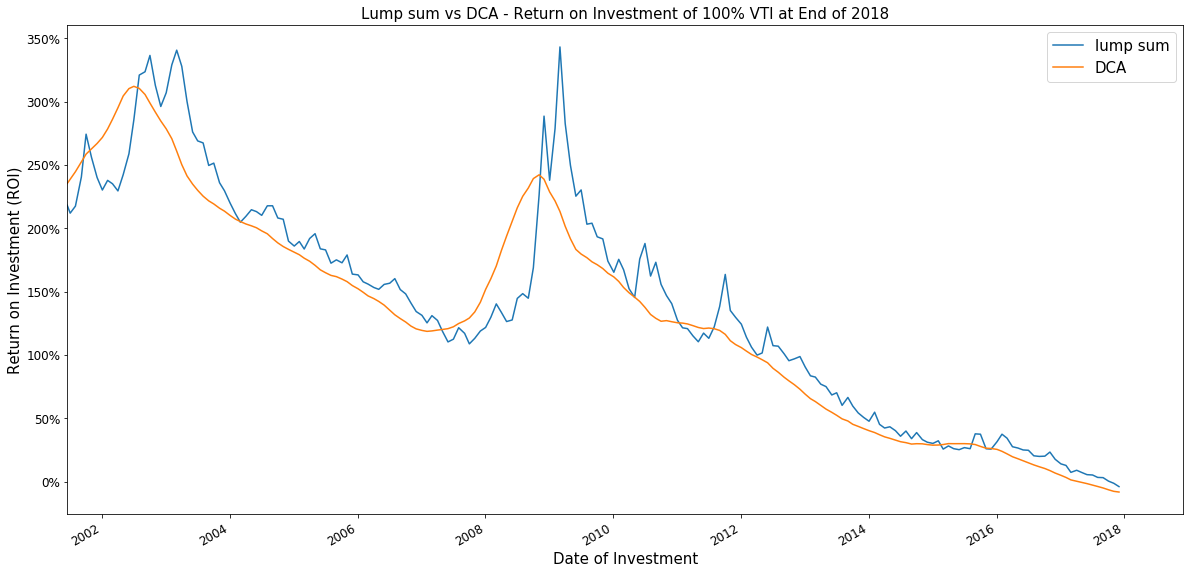

In [7]:
ax = sdf.plot(figsize=(20,10), fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Return on Investment (ROI)", fontsize=15)
ax.set_xlabel("Date of Investment", fontsize=15)
ax.set_title("Lump sum vs DCA - Return on Investment of 100% VTI at End of 2018", fontsize=15)
ax.legend(prop=dict(size=15))